# Computing integrals: overlap and kinetic

In this tutorial we will compute the overlap and kinetic energy integrals encountered in Hartree-Fock. Here, we will use the [Obara-Saika recursion scheme](https://aip.scitation.org/doi/10.1063/1.450106).

## Theory

### Cartesian Gaussian functions

Denote the origin of a 3-dimensional cartesian gaussian function by the coordinates $\mathbf{R} = (R_x, R_y, R_z)$.
Let $\mathbf{r} = (x, y, z)$ be the coordinates of the electron, and $\alpha$ be the orbital exponent. We can now define an *unnormalized* Cartesian Gaussian function as:

\begin{equation}
\phi(\mathbf r; \alpha, \mathbf n, \mathbf R) = (x - R_x)^{n_x} (y - R_y)^{n_y} (z - R_z)^{n_z} \exp[-\alpha (\mathbf r - \mathbf R)^2]
\end{equation}

where $\alpha$ is the orbital exponent, and $\mathbf{n} = (n_x, n_y, n_z)$ is the angular momentum index vector. The sum $n_x + n_y + n_z = \lambda$ will hereafter be referred to as the **angular momentum**. We define a **shell** to be a set of functions (*components*) which share the same origin $\mathbf{R}$, and angular momentum $\lambda$.

The shells with $\lambda$  equal to $0, 1, 2,...,$ are referred to as the $s, p, d, ...$ shell. Each shell has $(\lambda + 1) (\lambda + 2)/2$ components. The $s$ shell, with angular momentum $\lambda = 0$ has one component usually designated as $s$. The $p$ shell ($\lambda = 1$) has three components, designated as $p_x, p_y, p_z$. The $d$ shell ($\lambda = 2$) has six components, designated as $d_{xx}, d_{yy}, d_{zz}, d_{xy}, d_{xz}, d_{yz}$.

### Contractions

We represent a single component (an **atomic orbital**) by a linear combination of Gaussians ($c_1 \phi_1 + c_2 \phi_2 + c_3 \phi_3 ...$) hereon referred to as **primitives**. Representing the AOs in a basis set basis is called a *contraction*. For example, the STO-3G basis set uses three primitives for each atomic orbital basis function. Each primitive is weighted by a coefficient $c$.

Using our angular momentum index vector $\mathbf{n}$ we denote the single component of the $s$ shell to have angular momentum index $\mathbf{n} = \mathbf{0} = (0, 0, 0)$. Since the $p$ shell has three components, we may compactly express the angular momentum index vector as $\mathbf{1}_i$ where $i$ may be $x$, $y$, or $z$, and $\mathbf{1}_i = (\delta_{ix}, \delta_{iy}, \delta_{iz})$. For example, $p_x$ may be represented as $\mathbf{1}_x = (1, 0, 0)$. For the six components of the $d$ shell, we require a sum of two angular momentum index vectors $\mathbf{1}_i + \mathbf{1}_j$, where $(i,j = x,y,z)$. In this notation, the $d_{xy}$ component is $\mathbf{1}_x + \mathbf{1}_y = (1,0,0) + (0,1,0) = (1,1,0)$. To obtain higher order angular momentum components, we add the appropriate number of $\mathbf{1}_i$'s ($\mathbf{n}$'s).

### Normalization

Basis sets on the [basis set exchange](https://www.basissetexchange.org/) return coefficients corresponding to normalized primitives and unnormalized contractions (format: Gaussian). As we will see, the underlying recursions are valid for unnormalized primitives and, in the end, we should compute integrals over normalized contractions. As such, we 
1. denormalize the primitives by multiplying the contraction coefficients by the norms of the underlying primitives
1. normalize the basis functions by dividing the contraction coefficients by the (square root of the) norm of the basis function

### Two-center overlap integrals
Two-center overlap integrals over unnormalized cartesian gaussian functions are of the form:

\begin{equation}
(\mathbf a|\mathbf b) = \int d\mathbf r\ \phi(\mathbf r; \alpha_a, \mathbf a, \mathbf A)\phi(\mathbf r; \alpha_b, \mathbf b, \mathbf B)
\end{equation}

Given $(\mathbf 0_A | \mathbf 0_B)$, we can use the Obara-Saika recursion relation to obtain overlap integrals between all basis functions. The overlap over $s$ functions is given by:

\begin{equation}
(\mathbf 0_A | \mathbf 0_B) = \left(\frac{\pi}{\alpha}\right)^{3/2} \exp[-\xi(\mathbf A-\mathbf B)^2]
\end{equation}

where $\alpha = \alpha_a + \alpha_b$ and $\zeta = \frac{\alpha_a\alpha_b}{\alpha}$.
The recursion relations are given below. For a full derivation, see the [original paper](http://aip.scitation.org/doi/abs/10.1063/1.450106) by Obara and Saika. To increment the left side angular momentum:

\begin{equation}
(\mathbf a+\mathbf 1_i|\mathbf b) = (\mathbf{P - A})(\mathbf a|\mathbf b) + \frac{1}{2\alpha} N_i(\mathbf a)(\mathbf a-\mathbf 1_i|\mathbf b) + \frac{1}{2\alpha} N_i(\mathbf b)(\mathbf a|\mathbf b-\mathbf 1_i)
\end{equation}

and similarily, to increment the right side:

\begin{equation}
(\mathbf a|\mathbf b+\mathbf 1_i) = (\mathbf{P - B})(\mathbf a|\mathbf b) + \frac{1}{2\alpha} N_i(\mathbf a)(\mathbf a-\mathbf 1_i|\mathbf b) + \frac{1}{2\alpha} N_i(\mathbf b)(\mathbf a|\mathbf b-\mathbf 1_i)
\end{equation}

where 

\begin{equation}
\mathbf{P} = \frac{\alpha_a \mathbf{A} + \alpha_b \mathbf{B}} {\alpha} 
\end{equation}

and ${N}_i(\mathbf{a})$, ${N}_i(\mathbf{b})$ are just the $i$'th component of the angular momenta of $\mathbf{a}$ and $\mathbf{b}$.

To fill in the first row, the second term goes to zero, since we cannot have a negative angular momentum (cannot subtract $\mathbf 1_i$). To fill in the first column, the third term goes to zero for the same reason.

## Implementation

In [1]:
# Check if notebook is running on Colab
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
    
if IN_COLAB:
    !pip install pyscf # If asked, restart runtime after PySCF has been installed

In [2]:
# ==> Import Psi4 & NumPy <==
from pyscf import gto, scf
import numpy as np
import scipy

Construct a (highly strained) water molecule.

In [3]:
mol = gto.M(
    verbose = 0,
    atom = 'H 1.0 0.0 0.0; H 0.0 1.0 0.0; O 0.0 0.0 0.0',
    basis = 'sto-3g',
    unit = 'bohr',
    cart = True
)

PySCF offers the following methods to access information on the underlying basis:

In [34]:
print(f"Number of basis functions/shells: {mol.nbas}")
print("For the first basis function:")
print(f"Number of primitives: {mol.bas_nprim(0)}")
print(f"Exponents: {mol.bas_exp(0)}")
print(f"Normalized contraction coefficients: {mol.bas_ctr_coeff(0)}")
print(f"Angular momentum: {mol.bas_angular(0)}")
print(f"Coordinates of center basis function: {mol.bas_coord(0)}")
print(f"Norm of primitive with angular momentum 0 and exponent 1.0: {mol.gto_norm(0, 1.0)}")
# a test
print(mol.bas_ctr_coeff(0))
print(mol.bas_ctr_coeff(0) * np.array([[0],[1],[2]]))

Number of basis functions/shells: 5
For the first basis function:
Number of primitives: 3
Exponents: [3.42525091 0.62391373 0.1688554 ]
Normalized contraction coefficients: [[0.15432897]
 [0.53532814]
 [0.44463454]]
Angular momentum: 0
Coordinates of center basis function: [1. 0. 0.]
Norm of primitive with angular momentum 0 and exponent 1.0: 2.5264751109842587
[[0.15432897]
 [0.53532814]
 [0.44463454]]
[[0.        ]
 [0.53532814]
 [0.88926908]]



### Write the recursion function

The Obara-Saika recursion relationships depend on $\mathbf{P-A}$,  $\mathbf{P-B}$, $\alpha$, and the angular momentum values for $\mathbf a$ and $\mathbf b$, which we will denote as `PA`, `PB`, `alpha`, `AMa`, and `AMb`. 
Let's write a function that takes these parameters and returns three matrices containing the x, y and z components of our unnormalized overlap integrals. These same components also can be used to construct the kinetic energy as we will see.

For now, we will set $(\mathbf 0_A | \mathbf 0_B)$ to $1.0$ for simplicity. Later, we will set the value as defined above. 

[[  1.           2.           4.125        8.75        19.046875  ]
 [  2.           4.125        8.625       18.265625    39.171875  ]
 [  4.125        8.75        19.046875    42.4375      96.58398438]
 [  8.75        19.046875    42.46875     96.84179688 225.5234375 ]
 [ 19.046875    42.46875     96.84179688 225.53515625 535.80688477]]


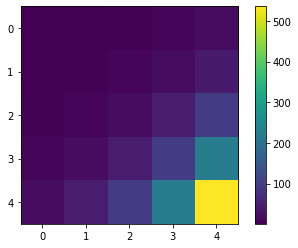

In [59]:
def os_recursion(PA, PB, alpha, AMa, AMb, start=1.0):
    if len(PA) != 3 or len(PB) != 3:
        raise "PA and PB must be xyz coordinates."
   
    # Allocate space x, y, and z matrices
    # We add one because the equation for the kinetic energy
    # integrals require terms one beyond those in the overlap
    x = np.zeros((AMa + 1, AMb + 1))
    y = np.zeros((AMa + 1, AMb + 1))
    z = np.zeros((AMa + 1, AMb + 1))

    # Define 1/2alpha factor for convenience
    oo2a = 1.0 / (2.0 * alpha)

    # Set initial conditions (0a|0b) to 1.0 for each cartesian component
    x[0, 0] = y[0, 0] = z[0, 0] = start
    
    # BEGIN RECURSION
    # Fill in the [0,1] position with PB
    # because we have (a|b+1) = (0A|1B) = PB*(0A|0B) + 0 + 1/2alpha*Ni(b)(OA|OB)
    # since b in this equation is 0 (b+1 = 1)n Ni(b) = 0 and thus we only have PB*(0A|0B) = PB*1
    if AMb > 0:
        x[0, 1] = PB[0]
        y[0, 1] = PB[1]
        z[0, 1] = PB[2]

        # Fill in the rest of row zero
        for b in range(1, AMb):
            x[0, b + 1] = PB[0] * x[0, b] + oo2a * b * x[0, b-1]
            y[0, b + 1] = PB[1] * y[0, b] + oo2a * b * y[0, b-1]
            z[0, b + 1] = PB[2] * z[0, b] + oo2a * b * z[0, b-1]
        # Now, we have for each cartesian component
        # | 1.0  PB #  #|
        # |  0   0  0  0|
        # |  0   0  0  0| 
        # |  0   0  0  0|

    # Upward recursion in a for all b's
    # Fill in the [1,0] position with PA
    if AMa > 0:                                                 
        # ADD CODE HERE
        x[1, 0] = PA[0]
        y[1, 0] = PA[1]
        z[1, 0] = PA[2]
        
    # Now, we have for each cartesian component
    # | 1.0  PB #  #|
    # |  PA  0  0  0|
    # |  0   0  0  0| 
    # |  0   0  0  0|

        # Fill in the rest of row one
        for b in range(0, AMb):
            # ADD CODE HERE
            x[1, b+1] = PB[0] * x[1, b] + oo2a * 1 * x[0, b] + oo2a * b * x[0, b-1]
            y[1, b+1] = PB[1] * y[1, b] + oo2a * 1 * y[0, b] + oo2a * b * y[0, b-1]
            z[1, b+1] = PB[2] * z[1, b] + oo2a * 1 * z[0, b] + oo2a * b * z[0, b-1]
            
            
        # Now, we have for each cartesian component
        # | 1.0  PB #  #|
        # |  PA  #  #  #|
        # |  0   0  0  0| 
        # |  0   0  0  0|

        # Fill in the rest of column 0
        for a in range(1, AMa):
            x[a + 1, 0] = PA[0] * x[a, 0] + oo2a * a * x[a - 1, 0]
            y[a + 1, 0] = PA[1] * y[a, 0] + oo2a * a * y[a - 1, 0]
            z[a + 1, 0] = PA[2] * z[a, 0] + oo2a * a * z[a - 1, 0]
            
        # Now, we have for each cartesian component
        # | 1.0  PB #  #|
        # |  PA  #  #  #|
        # |  #   0  0  0| 
        # |  #   0  0  0|
    
        # Fill in the rest of the a'th row
            a = a + 1 # this makes the formula for b increment more understandable
            for b in range(0, AMb):
                x[a, b+1] = PB[0] * x[a,b] + oo2a * a * x[a-1, b] + oo2a * b * x[a, b-1]
                y[a, b+1] = PB[1] * y[a,b] + oo2a * a * y[a-1, b] + oo2a * b * y[a, b-1]
                z[a, b+1] = PB[2] * z[a,b] + oo2a * a * z[a-1, b] + oo2a * b * z[a, b-1]

        # Now, we have for each cartesian component
        # | 1.0  PB #  #|
        # |  PA  #  #  #|
        # |  #   #  #  #| 
        # |  #   #  #  #|
        
    # Return the results
    return (x, y, z)

x, y, z = os_recursion([2,2,2],[2,2,2],4,4,4, start=1)
print(x)
import matplotlib.pyplot as plt
plt.imshow(x)
plt.colorbar()

### Normalize the basis functions

In [50]:
bas_norms = np.zeros(mol.nbas)
for i in range(mol.nbas):
    # each shell has some number of primitives which make up each component of a shell
    nprimi = mol.nbas
    # loop over the primitives within a shell
    for a in range(nprimi):
        for b in range(nprimi):
            # get exponents primitives
            expa = mol.bas_exp(a)
            expb = mol.bas_exp(b)

            # the contraction coefficients associated to the normalized GTOs, corresponding to the data from the EMSL basis set exchange
            coefa = mol.bas_ctr_coeff(a)
            coefb = mol.bas_ctr_coeff(b)

            # get angular momenta
            AMa = mol.bas_angular(a)
            AMb = mol.bas_angular(b)

            # denormalize coefficients by multiplying contraction coefficients by the norms of the underlying primitives
            coefa = coefa * np.array([[mol.gto_norm(AMa, expa[0])], [mol.gto_norm(AMa, expa[1])], [mol.gto_norm(AMa, expa[2])]])
            coefb = coefb * np.array([[mol.gto_norm(AMb, expb[0])], [mol.gto_norm(AMb, expb[1])], [mol.gto_norm(AMb, expb[2])]])

            # defining centers for each basis function 
            A = mol.bas_coord(a)
            B = mol.bas_coord(b)

            alpha = expa + expb
            zeta = expa * expb / alpha
            P = (expa * A + expb * B)/alpha
            PA = P - A
            PB = P - B
            AB = A - B
            start = (np.pi / alpha)**(3. / 2.) * np.exp(-zeta * (AB[0]**2 + AB[1]**2 + AB[2]**2))
            
            # call the recursion
            x, y, z = os_recursion(PA, PB, alpha, AMa+1, AMb+1, start=start)
            
            # We only need to look at one component to determine the normalization.
            # We take the component with the highest x momentum
            la = AMa
            lb = AMb 
            ma = 0
            mb = 0
            na = 0
            nb = 0
            bas_norms[i] += # ???


bas_prefactor = 1.0 / np.sqrt(bas_norms)

SyntaxError: invalid syntax (2763214317.py, line 47)

### Overlap Integrals

Now that we have our recursion set up and our basis functions normalized, we are ready to compute the integrals, starting with the overlap integrals.

In [ ]:
# make space to store the overlap integral matrix
S = # ADD CODE HERE

# loop over the shells
for i in range(mol.nbas):
    for j in range(mol.nbas):
        # ADD CODE HERE

        for a in range(nprimi):  
            for b in range(nprimj):
                # ADD CODE HERE
               
                # call the recursion
                x, y, z = os_recursion(PA, PB, alpha, AMa+1, AMb+1)
                
                # We use counters to keep track of which component (e.g., p_x, p_y, p_z)
                # within the shell we are on
                counta = 0
                
                for p in range(AMa + 1):
                    la = AMa - p                    # Let l take on all values, and p be the leftover a.m.
                    for q in range(p + 1):
                        ma = p - q                  # distribute all leftover a.m. to m and n
                        na = q
                        countb = 0
                        for r in range(AMb + 1):
                            lb = AMb - r            # Let l take on all values, and r the leftover a.m.
                            for s in range(r + 1):
                                mb = r - s          # distribute all leftover a.m. to m and n
                                nb = s
                                
                                # set the value in the full overlap matrix
                                S[i + counta, j + countb] += # ADD CODE HERE
 
                                countb += 1
                        counta += 1

In [ ]:
# Check our overlap against PySCF
S_ref = mol.intor('int1e_ovlp')
np.allclose(S, S_ref, 6)


### Kinetic energy integrals 

Before proceeding to an analysis of the kinetic energy integral, it will prove convenient to establish a short-hand notation for integrals related to the overlap integral:
\begin{equation}
(0 \mid 0) = \int G(\alpha_a, \mathbf A, l_a, m_a, n_a) G(\alpha_b, \mathbf B, l_b, m_b, n_b)\ d\tau
\end{equation}
The symbol $(+1 \mid 0)_{\mathrm{x}}$ will denote an integral of the form given by the above equation, except that the quantum number $l_a$ has been incremented by 1. Similarly, $(0 \mid +1)_{\mathrm{x}}$ increments $l_b$ by 1. Quantum numbers $m$ and $n$ are incremented in the same way with subscripts $y$ and $z$.

The kinetic energy integral is defined as

\begin{equation}
T = - \frac{1}{2}  \int G(\alpha_a, \mathbf A, l_a, m_a, n_a) \left(\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2}\right) G(\alpha_b, \mathbf B, l_b, m_b, n_b)\ d\tau
\end{equation}

The equation for this integral is "unsymmetric" because the quantum numbers of the Gaussian-type function centered on $\mathbf B$ are altered by the Laplacian while those of the Gaussian-type function centered on $\mathbf A$ are not. The symmetric $x$, $y$, and $z$ components are given by:


\begin{equation}
T_x = \frac{1}{2}\Big\{l_a l_b (-1|-1)_{\mathrm{x}} + 4\alpha_a \alpha_b (+1|+1)_{\mathrm{x}} - 2\alpha_a l_b (+1|-1)_{\mathrm{x}} - 2\alpha_b l_a (-1|+1)_{\mathrm{x}}\Big\}
\end{equation}

\begin{equation}
T_y = \frac{1}{2}\Big\{l_a l_b (-1|-1)_{\mathrm{y}} + 4\alpha_a \alpha_b (+1|+1)_{\mathrm{y}} - 2\alpha_a l_b (+1|-1)_{\mathrm{y}} - 2\alpha_b l_a (-1|+1)_{\mathrm{y}}\Big\}
\end{equation}

\begin{equation}
T_z = \frac{1}{2}\Big\{l_a l_b (-1|-1)_{\mathrm{z}} + 4\alpha_a \alpha_b (+1|+1)_{\mathrm{z}} - 2\alpha_a l_b (+1|-1)_{\mathrm{z}} - 2\alpha_b l_a (-1|+1)_{\mathrm{z}}\Big\}
\end{equation}

and the full kinetic energy integral is:

\begin{equation}
T =  (T_x + T_y + T_z)
\end{equation}


In [ ]:
T = np.zeros_like(S)

# ADD CODE HERE

Check the kinetic energy integrals:

In [ ]:
T_ref = mol.intor('int1e_kin')
print(np.allclose(T, T_ref, 6))